## Data Preprocessing & Exploratory Data Visualizations

In this notebook, we convert the raw `.gdf` file into data that is compatible with the Python 'mne' package. This allows us to effectively process and visualize the EEG signals.

We also inspect cases of left and right-hand imagery separately by analyzing timelines of several topographic maps at distinct milliseconds after the cue to imagine the movement.


In [ ]:
#!pip install pyriemann
#!pip install moabb
!pip install mne

In [ ]:
import mne
import os
import numpy as np
import mne
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from mne.decoding import CSP

In [ ]:

#filename ="/content/drive/MyDrive/0000_thesis_msc_mental_workload/000_data_MI_27giga_folder/A1_try/A1/A1_CE_baseline.gdf"


#path = "/path/to/your/data/folder/"
path = "/content/drive/MyDrive/0000_thesis_msc_mental_workload/000_data_MI_27giga_folder/A1_try/A1"
baseline_ce = os.path.join(path, "A1_CE_baseline.gdf")
baseline_oe = os.path.join(path, "A1_OE_baseline.gdf")
run1 = os.path.join(path, "A1_R1_acquisition.gdf")
run2 = os.path.join(path, "A1_R2_acquisition.gdf")
run3 = os.path.join(path, "A1_R3_onlineT.gdf")
run4 = os.path.join(path, "A1_R4_onlineT.gdf")
run5 = os.path.join(path, "A1_R5_onlineT.gdf")
run6 = os.path.join(path, "A1_R6_onlineT.gdf")

In [ ]:
raw_baseline_ce = mne.io.read_raw_gdf(baseline_ce, preload=True)
raw_baseline_oe = mne.io.read_raw_gdf(baseline_oe, preload=True)
raw_run1 = mne.io.read_raw_gdf(run1, preload=True)
raw_run2 = mne.io.read_raw_gdf(run2, preload=True)
raw_run3 = mne.io.read_raw_gdf(run3, preload=True)
raw_run4 = mne.io.read_raw_gdf(run4, preload=True)
raw_run5 = mne.io.read_raw_gdf(run5, preload=True)
raw_run6 = mne.io.read_raw_gdf(run6, preload=True)

# Combine the raw files

combined_raw = mne.concatenate_raws([raw_run1,raw_run2,raw_run3,raw_run4, raw_run5, raw_run6])
#combined_raw = raw_run1.copy().append([ raw_run2,raw_run3,raw_run4, raw_run5, raw_run6])
raw=combined_raw

##### use this after defining epochs and left right epoch, if you wanna seperate runs

# # Access specific participants (assuming non-overlapping event codes)
# participant1_epochs = epochs[0: len(raw1.events)]
# participant2_epochs = epochs[len(raw1.events): len(raw1.events) + len(raw2.events)]
# participant3_epochs = epochs[len(raw1.events) + len(raw2.events):]

Extracting EDF parameters from /content/drive/MyDrive/0000_thesis_msc_mental_workload/000_data_MI_27giga_folder/A1_try/A1/A1_CE_baseline.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
Fz, FCz, Cz, CPz, Pz, C1, C3, C5, C2, C4, C6, EOG1, EOG2, EOG3, EMGg, EMGd, F4, FC2, FC4, FC6, CP2, CP4, CP6, P4, F3, FC1, FC3, FC5, CP1, CP3, CP5, P3
Creating raw.info structure...
Reading 0 ... 95775  =      0.000 ...   187.061 secs...
Extracting EDF parameters from /content/drive/MyDrive/0000_thesis_msc_mental_workload/000_data_MI_27giga_folder/A1_try/A1/A1_OE_baseline.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
Fz, FCz, Cz, CPz, Pz, C1, C3, C5, C2, C4, C6, EOG1, EOG2, EOG3, EMGg, EMGd, F4, FC2, FC4, FC6, CP2, CP4, CP6, P4, F3, FC1, FC3, FC5, CP1, CP3, CP5, P3
Creating raw.info structure...
Reading 0 ... 9577

<ipython-input-11-28e4bd96ef39>:3: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_run1 = mne.io.read_raw_gdf(run1, preload=True)


Extracting EDF parameters from /content/drive/MyDrive/0000_thesis_msc_mental_workload/000_data_MI_27giga_folder/A1_try/A1/A1_R3_onlineT.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
Fz, FCz, Cz, CPz, Pz, C1, C3, C5, C2, C4, C6, EOG1, EOG2, EOG3, EMGg, EMGd, F4, FC2, FC4, FC6, CP2, CP4, CP6, P4, F3, FC1, FC3, FC5, CP1, CP3, CP5, P3
Creating raw.info structure...
Reading 0 ... 230431  =      0.000 ...   450.061 secs...


<ipython-input-11-28e4bd96ef39>:4: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_run2 = mne.io.read_raw_gdf(run2, preload=True)


Extracting EDF parameters from /content/drive/MyDrive/0000_thesis_msc_mental_workload/000_data_MI_27giga_folder/A1_try/A1/A1_R4_onlineT.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
Fz, FCz, Cz, CPz, Pz, C1, C3, C5, C2, C4, C6, EOG1, EOG2, EOG3, EMGg, EMGd, F4, FC2, FC4, FC6, CP2, CP4, CP6, P4, F3, FC1, FC3, FC5, CP1, CP3, CP5, P3
Creating raw.info structure...
Reading 0 ... 230431  =      0.000 ...   450.061 secs...
Extracting EDF parameters from /content/drive/MyDrive/0000_thesis_msc_mental_workload/000_data_MI_27giga_folder/A1_try/A1/A1_R5_onlineT.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
Fz, FCz, Cz, CPz, Pz, C1, C3, C5, C2, C4, C6, EOG1, EOG2, EOG3, EMGg, EMGd, F4, FC2, FC4, FC6, CP2, CP4, CP6, P4, F3, FC1, FC3, FC5, CP1, CP3, CP5, P3
Creating raw.info structure...
Reading 0 ... 23043

In [ ]:
channel_types = {ch: 'eog' if ch.startswith('EOG') else 'emg' for ch in ['EOG1', 'EOG2', 'EOG3', 'EMGg', 'EMGd']}
raw.set_channel_types(channel_types)

<RawGDF | A1_R1_acquisition.gdf, 32 x 1382464 (2700.1 s), ~337.5 MB, data loaded>

In [ ]:
y

array([8, 8, 9, 8, 9, 8, 9, 9, 8, 8, 9, 9, 9, 8, 9, 8, 9, 8, 9, 8, 9, 8,
       9, 8, 8, 8, 9, 9, 9, 8, 9, 9, 9, 8, 8, 8, 9, 8, 9, 8, 9, 8, 9, 8,
       8, 8, 9, 9, 9, 8, 9, 9, 9, 8, 9, 8, 9, 8, 8, 8, 9, 8, 8, 8, 8, 8,
       9, 8, 9, 9, 8, 9, 9, 9, 8, 8, 9, 9, 9, 8, 9, 8, 9, 8, 8, 8, 9, 9,
       9, 8, 9, 8, 9, 8, 9, 8, 9, 9, 9, 8, 9, 8, 8, 8, 9, 8, 9, 8, 9, 8,
       8, 8, 9, 9, 9, 8, 9, 8, 9, 8, 8, 8, 9, 8, 9, 9, 9, 8, 9, 8, 9, 8,
       8, 8, 9, 9, 9, 9, 9, 8, 8, 9, 9, 8, 8, 8, 9, 8, 9, 8, 9, 9, 8, 9,
       9, 8, 8, 8, 9, 8, 9, 8, 9, 8, 9, 8, 8, 9, 9, 8, 8, 9, 8, 8, 9, 8,
       9, 9, 9, 8, 9, 8, 8, 8, 9, 8, 9, 9, 9, 8, 8, 9, 9, 8, 9, 8, 9, 8,
       9, 8, 9, 8, 9, 8, 9, 8, 8, 9, 9, 8, 8, 8, 9, 9, 9, 8, 8, 9, 9, 8,
       9, 8, 9, 8, 9, 8, 8, 8, 9, 8, 8, 8, 9, 9, 8, 8, 9, 9, 9, 9])

# The following channels are excluded:

1. EOG1, EOG2, EOG3: These are the electrooculography (EOG) channels, which record eye movements and are not relevant to motor imagery classification.
2. EMGg, EMGd: These are electromyography (EMG) channels, which record muscle activity. EMG signals are not necessary for MI classification based on EEG data.

We retain the central and parietal channels (e.g., Cz, CPz, Pz, C1, C3, C5, C2, C4, C6, CP1, CP3, CP5, CP2, CP4, CP6) as they are more likely to capture motor-related activity. You may also want to keep some frontal and fronto-central channels (e.g., Fz, FCz, F3, F4, FC1, FC2, FC3, FC4, FC5, FC6) since they could capture information related to motor planning and execution.


Filtering raw data in 6 contiguous segments
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1691 samples (3.303 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.8s finished


Used Annotations descriptions: ['1010', '32769', '32770', '33281', '33282', '33284', '768', '769', '770', '781', '786', '800']
Not setting metadata
240 matching events found
Setting baseline interval to [-0.19921875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 240 events and 615 original time points ...
0 bad epochs dropped


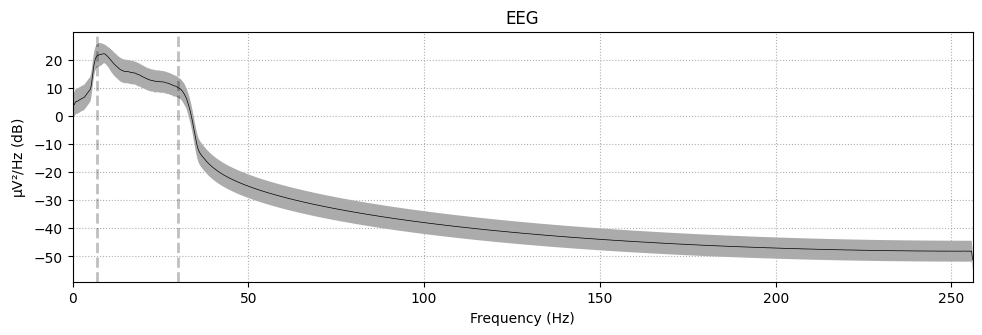

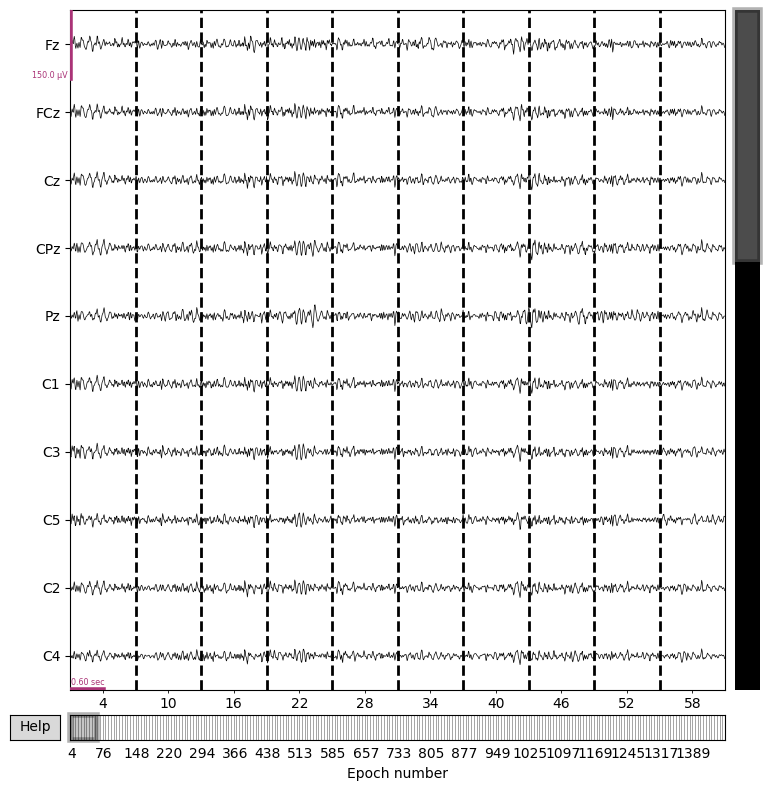

No projector specified for this dataset. Please consider the method self.add_proj.


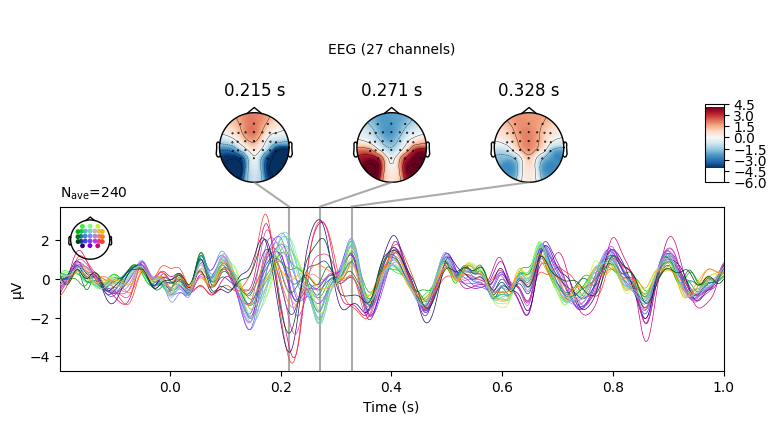

Computing rank from data with rank=None
    Using tolerance 0.00021 (2.2e-16 eps * 32 dim * 3e+10  max singular value)
    Estimated rank (mag): 32
    MAG: rank 32 computed from 32 data channels with 0 projectors
Reducing data rank from 32 -> 32
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00018 (2.2e-16 eps * 32 dim * 2.6e+10  max singular value)
    Estimated rank (mag): 32
    MAG: rank 32 computed from 32 data channels with 0 projectors
Reducing data rank from 32 -> 32
Estimating covariance using EMPIRICAL
Done.
Classification accuracy: 0.67


In [ ]:
### base vis and classification 0.65 is accuracy w 2 class -0.2 to 1 sec and no artifact remova;

# Preprocessing
raw.filter(l_freq=1, h_freq=30)  # Band-pass filter

# Set channel types for non-EEG channels
channel_types = {ch: 'eog' if ch.startswith('EOG') else 'emg' for ch in ['EOG1', 'EOG2', 'EOG3', 'EMGg', 'EMGd']}
raw.set_channel_types(channel_types)

# Set montage
montage = mne.channels.make_standard_montage("standard_1020")
raw.set_montage(montage, on_missing='ignore')



#### Find the events time positions
events, event_id = mne.events_from_annotations(raw)
event_id = {'769': 8, '770': 9}

tmin, tmax = -0.2, 1


####DROP-MAYBE ADJUST SO IT DROPS WHOLE TRIAL
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True, baseline=(None, 0), preload=True, event_repeated="drop")

# Visualize the data
epochs.plot(n_epochs=10, n_channels=10, scalings=dict(eeg=75e-6))  # Adjust the `scalings` parameter if necessary
epochs.average().plot_joint()

# Epochs to numpy array (samples, channels, time)
X = epochs.get_data()
y = epochs.events[:, -1]

###### for final binary classification -  if i rename them earlier it gives an error, look into it, so that indexes arent confused
#from 58 jumps to 67 % after binary labels are adjusted from 8 9 to 0 1 in y. do check if doesnt corrupt results otherwise
y = np.where(y == 8, 0, 1)


# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Classification pipeline
# clf = Pipeline([
#     ('csp', CSP(n_components=4, reg=None, log=True, norm_trace=False)),
#     ('scaler', StandardScaler()),
#     ('lda', LinearDiscriminantAnalysis())
# ])

clf = Pipeline([
    ('csp', CSP(n_components=4, reg=None, log=True, norm_trace=False)),
    ('scaler', StandardScaler()),
    ('lda', LinearDiscriminantAnalysis(shrinkage='auto', solver='eigen'))
])


# Train and evaluate the classifier
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print("Classification accuracy: {:.2f}".format(score))

Filtering raw data in 6 contiguous segments
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1691 samples (3.303 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.4s finished


Used Annotations descriptions: ['1010', '32769', '32770', '33281', '33282', '33284', '768', '769', '770', '781', '786', '800']
Not setting metadata
120 matching events found
Setting baseline interval to [-0.19921875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 120 events and 615 original time points ...
0 bad epochs dropped
Not setting metadata
120 matching events found
Setting baseline interval to [-0.19921875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 120 events and 615 original time points ...
0 bad epochs dropped
Left Hand Data:


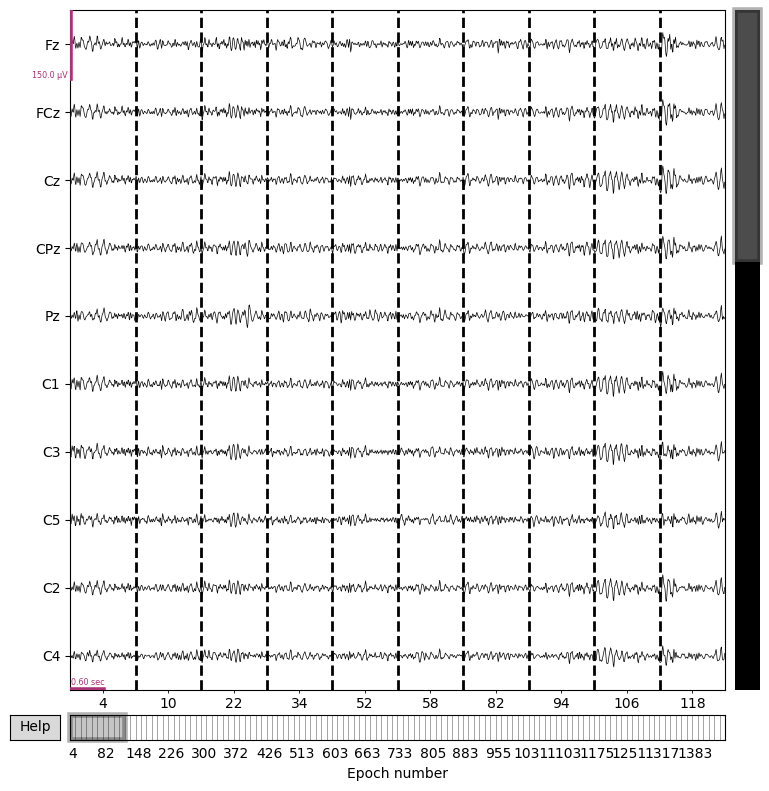

No projector specified for this dataset. Please consider the method self.add_proj.


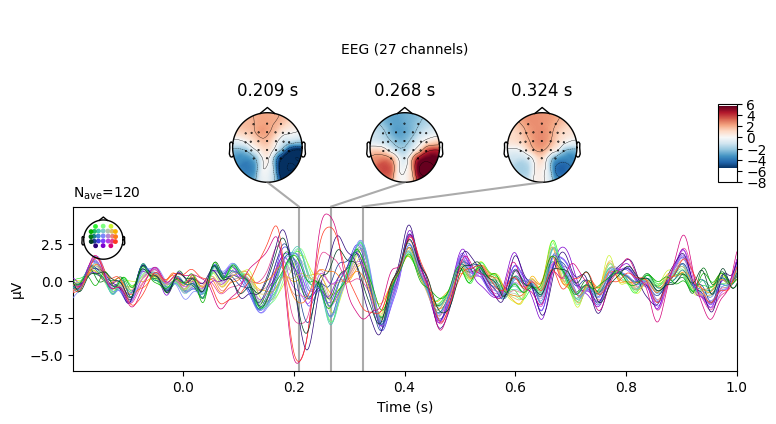

Right Hand Data:


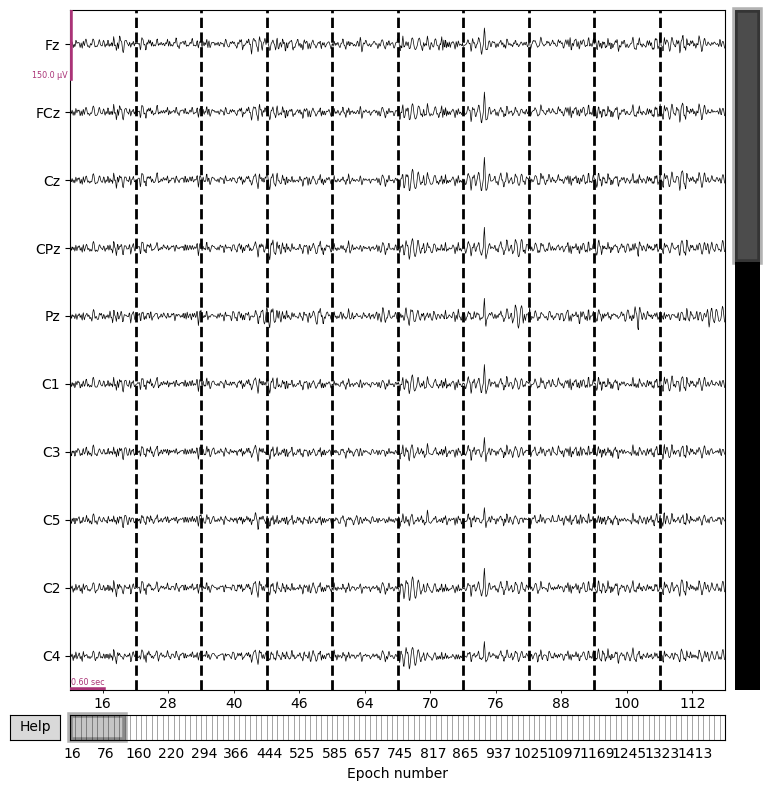

No projector specified for this dataset. Please consider the method self.add_proj.


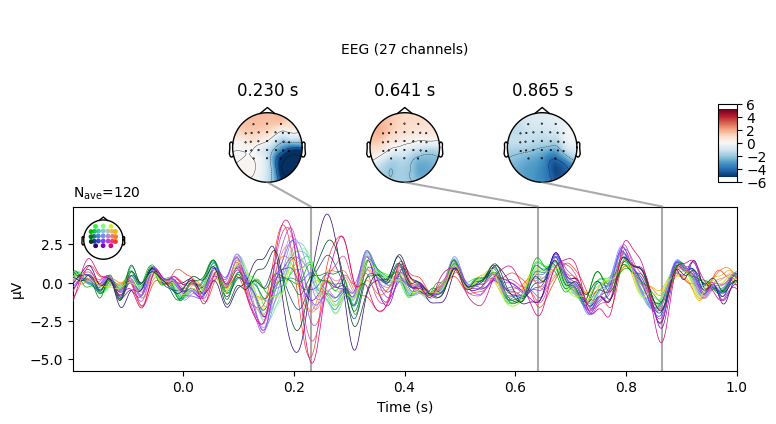

Not setting metadata
240 matching events found
Applying baseline correction (mode: mean)
Computing rank from data with rank=None


<ipython-input-33-f918af23f198>:41: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs([epochs_left, epochs_right])


    Using tolerance 0.00021 (2.2e-16 eps * 32 dim * 2.9e+10  max singular value)
    Estimated rank (mag): 32
    MAG: rank 32 computed from 32 data channels with 0 projectors
Reducing data rank from 32 -> 32
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00019 (2.2e-16 eps * 32 dim * 2.7e+10  max singular value)
    Estimated rank (mag): 32
    MAG: rank 32 computed from 32 data channels with 0 projectors
Reducing data rank from 32 -> 32
Estimating covariance using EMPIRICAL
Done.
Classification accuracy: 0.61


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from mne.decoding import CSP
import mne

# Preprocessing
raw.filter(l_freq=1, h_freq=30)  # Band-pass filter

# Set channel types for non-EEG channels
channel_types = {ch: 'eog' if ch.startswith('EOG') else 'emg' for ch in ['EOG1', 'EOG2', 'EOG3', 'EMGg', 'EMGd']}
raw.set_channel_types(channel_types)

# Set montage
montage = mne.channels.make_standard_montage("standard_1020")
raw.set_montage(montage, on_missing='ignore')

# Find the events time positions
events, event_id = mne.events_from_annotations(raw)
event_id = {'769': 8, '770': 9}

tmin, tmax = -0.2, 1

# Epoch the data for left hand and right hand separately
epochs_left = mne.Epochs(raw, events, event_id={'769': 8}, tmin=tmin, tmax=tmax, proj=True, baseline=(None, 0), preload=True, event_repeated="drop")
epochs_right = mne.Epochs(raw, events, event_id={'770': 9}, tmin=tmin, tmax=tmax, proj=True, baseline=(None, 0), preload=True, event_repeated="drop")

# Visualize the left hand data
print("Left Hand Data:")
epochs_left.plot(n_epochs=10, n_channels=10, scalings=dict(eeg=75e-6))
epochs_left.average().plot_joint()

# Visualize the right hand data
print("Right Hand Data:")
epochs_right.plot(n_epochs=10, n_channels=10, scalings=dict(eeg=75e-6))
epochs_right.average().plot_joint()

# Combine the data for classification
epochs = mne.concatenate_epochs([epochs_left, epochs_right])

X = epochs.get_data()
y = epochs.events[:, -1]
y = np.where(y == 8, 0, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = Pipeline([
    ('csp', CSP(n_components=4, reg=None, log=True, norm_trace=False)),
    ('scaler', StandardScaler()),
    ('lda', LinearDiscriminantAnalysis(shrinkage='auto', solver='eigen'))
])

# Train and evaluate the classifier
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print("Classification accuracy: {:.2f}".format(score))


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import mne

# Assuming you have already created epochs for left and right hand events as shown in previous responses
# epochs_left and epochs_right

# Compute the average for each condition
evoked_left = epochs_left.average()
evoked_right = epochs_right.average()

# Set the time point for which you want to plot the topographic map (in seconds)
timepoint = 0.2  # You can adjust this value

# Find the index corresponding to the desired time point
index = np.argmin(np.abs(evoked_left.times - timepoint))

# Plot the topographic maps for each condition
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

evoked_left.plot_topomap(times=evoked_left.times[index], axes=axes[0], show=False)
axes[0].set_title(f'Left Hand Event at {timepoint} s')

evoked_right.plot_topomap(times=evoked_right.times[index], axes=axes[1], show=False)
axes[1].set_title(f'Right Hand Event at {timepoint} s')

plt.show()


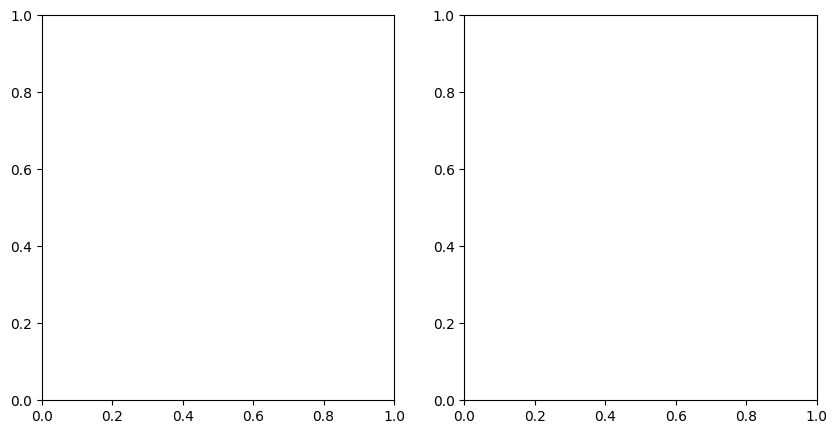

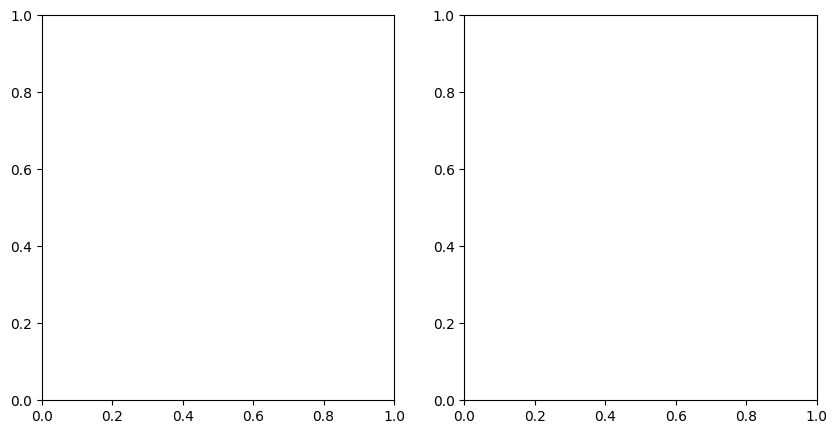

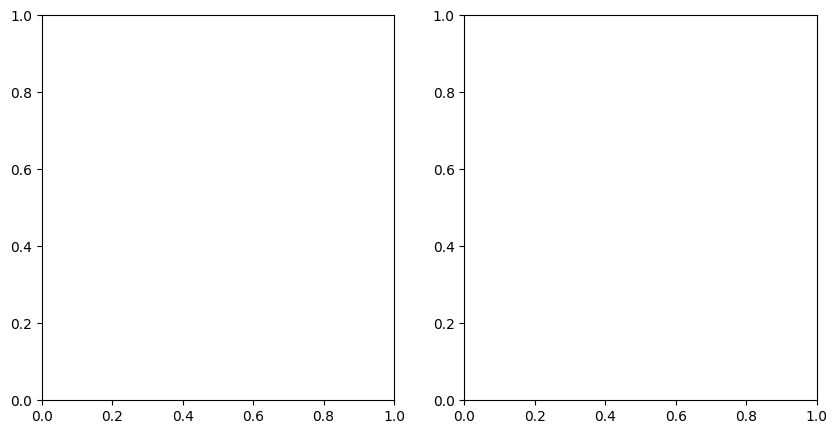

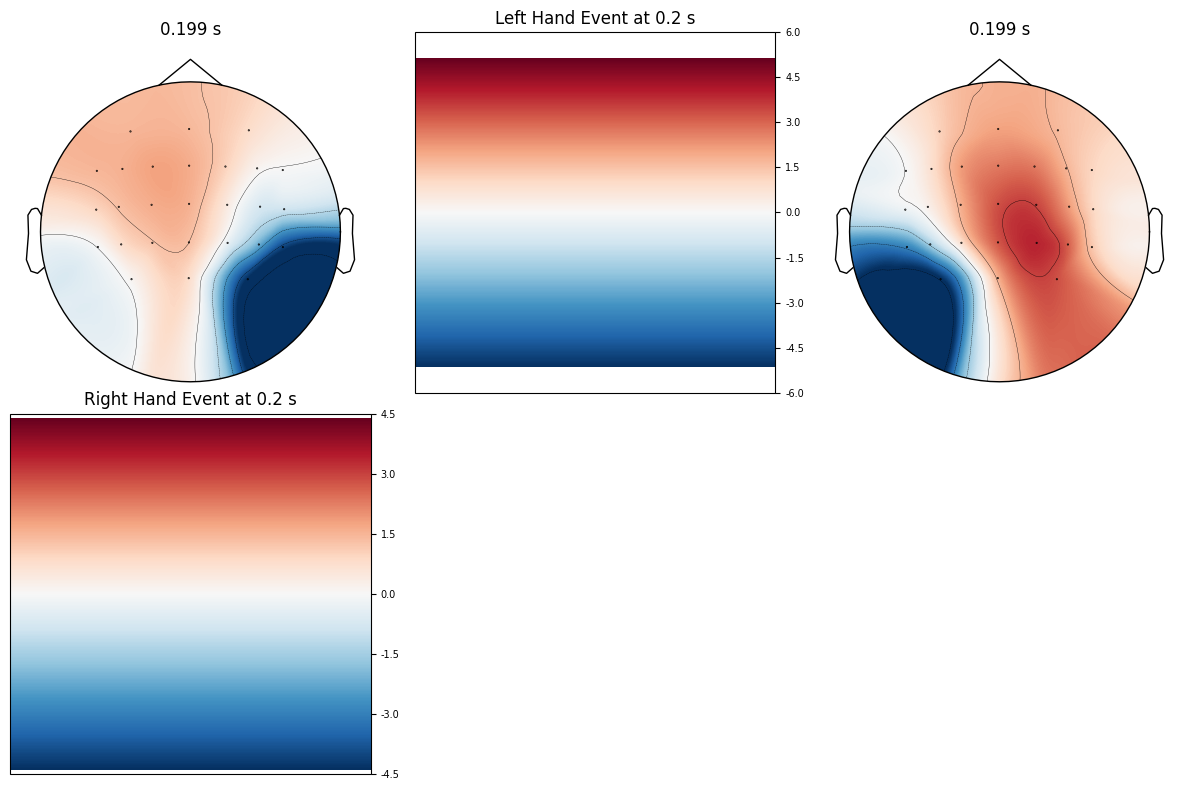

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import mne

# Assuming you have already created epochs for left and right hand events as shown in previous responses
# epochs_left and epochs_right

# Compute the average for each condition
evoked_left = epochs_left.average()
evoked_right = epochs_right.average()

# Set the time point for which you want to plot the topographic map (in seconds)
timepoint = 0.2  # You can adjust this value

# Find the index corresponding to the desired time point
index = np.argmin(np.abs(evoked_left.times - timepoint))

# Plot the topographic maps for each condition
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

evoked_left.plot_topomap(times=evoked_left.times[index], axes=axes[:2], colorbar=True, show=False)
axes[1].set_title(f'Left Hand Event at {timepoint} s')

evoked_right.plot_topomap(times=evoked_right.times[index], axes=axes[2:4], colorbar=True, show=False)
axes[3].set_title(f'Right Hand Event at {timepoint} s')

# Hide the unused axes
axes[4].set_visible(False)
axes[5].set_visible(False)

plt.tight_layout()
plt.show()


In [ ]:
X[1][1]

array([ 3.77090887e-06,  4.82096468e-06,  5.95696977e-06,  7.04809166e-06,
        7.94859289e-06,  8.51476814e-06,  8.62265528e-06,  8.18436348e-06,
        7.16099064e-06,  5.57048324e-06,  3.48937503e-06,  1.04805388e-06,
       -1.58004020e-06, -4.19417931e-06, -6.58539915e-06, -8.55679346e-06,
       -9.94287796e-06, -1.06259701e-05, -1.05478800e-05, -9.71573942e-06,
       -8.20144162e-06, -6.13485267e-06, -3.69159826e-06, -1.07676671e-06,
        1.49375998e-06,  3.81246147e-06,  5.69796572e-06,  7.00983367e-06,
        7.65908513e-06,  7.61369148e-06,  6.89879051e-06,  5.59189839e-06,
        3.81384958e-06,  1.71654757e-06, -5.31170283e-07, -2.75817220e-06,
       -4.80485215e-06, -6.53498469e-06, -7.84473628e-06, -8.66827989e-06,
       -8.97980609e-06, -8.79205822e-06, -8.15181279e-06, -7.13295795e-06,
       -5.82797781e-06, -4.33872317e-06, -2.76734098e-06, -1.20815180e-06,
        2.58879695e-07,  1.57262746e-06,  2.69300592e-06,  3.60088573e-06,
        4.29593747e-06,  

In [ ]:
y

array([8, 8, 9, 8, 9, 8, 9, 9, 8, 8, 9, 9, 9, 8, 9, 8, 9, 8, 9, 8, 9, 8,
       9, 8, 8, 8, 9, 9, 9, 8, 9, 9, 9, 8, 8, 8, 9, 8, 9, 8, 9, 8, 9, 8,
       8, 8, 9, 9, 9, 8, 9, 9, 9, 8, 9, 8, 9, 8, 8, 8, 9, 8, 8, 8, 8, 8,
       9, 8, 9, 9, 8, 9, 9, 9, 8, 8, 9, 9, 9, 8, 9, 8, 9, 8, 8, 8, 9, 9,
       9, 8, 9, 8, 9, 8, 9, 8, 9, 9, 9, 8, 9, 8, 8, 8, 9, 8, 9, 8, 9, 8,
       8, 8, 9, 9, 9, 8, 9, 8, 9, 8, 8, 8, 9, 8, 9, 9, 9, 8, 9, 8, 9, 8,
       8, 8, 9, 9, 9, 9, 9, 8, 8, 9, 9, 8, 8, 8, 9, 8, 9, 8, 9, 9, 8, 9,
       9, 8, 8, 8, 9, 8, 9, 8, 9, 8, 9, 8, 8, 9, 9, 8, 8, 9, 8, 8, 9, 8,
       9, 9, 9, 8, 9, 8, 8, 8, 9, 8, 9, 9, 9, 8, 8, 9, 9, 8, 9, 8, 9, 8,
       9, 8, 9, 8, 9, 8, 9, 8, 8, 9, 9, 8, 8, 8, 9, 9, 9, 8, 8, 9, 9, 8,
       9, 8, 9, 8, 9, 8, 8, 8, 9, 8, 8, 8, 9, 9, 8, 8, 9, 9, 9, 9])

In [ ]:

events, event_id = mne.events_from_annotations(raw)
event_id

Used Annotations descriptions: ['1010', '32769', '32770', '33281', '33282', '33284', '768', '769', '770', '781', '786', '800']


{'1010': 1,
 '32769': 2,
 '32770': 3,
 '33281': 4,
 '33282': 5,
 '33284': 6,
 '768': 7,
 '769': 8,
 '770': 9,
 '781': 10,
 '786': 11,
 '800': 12}

In [ ]:


# Filter the raw signal with a band pass filter in 7-35 Hz

raw.filter(7., 35., fir_design='firwin')

Filtering raw data in 6 contiguous segments
Setting up band-pass filter from 7 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 845 samples (1.650 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.5s finished


<RawGDF | A1_R1_acquisition.gdf, 32 x 1382464 (2700.1 s), ~337.6 MB, data loaded>

In [ ]:
X[1]

array([[ 2.45303676e-05,  2.52306874e-05,  2.60418375e-05, ...,
         1.14979570e-05,  1.28131450e-05,  1.42068208e-05],
       [ 2.62855341e-05,  2.72123475e-05,  2.82414394e-05, ...,
         9.28501901e-06,  1.06016069e-05,  1.20956873e-05],
       [ 2.70228671e-05,  2.79238856e-05,  2.89521540e-05, ...,
         8.24819538e-06,  9.67974474e-06,  1.13147711e-05],
       ...,
       [ 2.70077719e-05,  2.79380111e-05,  2.90917895e-05, ...,
         2.76151498e-07,  2.11821720e-06,  4.35800488e-06],
       [ 1.90692100e-05,  1.94268884e-05,  2.03135779e-05, ...,
         2.75037821e-06,  4.43988160e-06,  6.59899340e-06],
       [ 2.30003648e-05,  2.40048355e-05,  2.52841097e-05, ...,
        -8.16110949e-06, -5.57893479e-06, -2.51364704e-06]])

Filtering raw data in 6 contiguous segments
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1691 samples (3.303 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.7s finished


Used Annotations descriptions: ['1010', '32769', '32770', '33281', '33282', '33284', '768', '769', '770', '781', '786', '800']
Not setting metadata
240 matching events found
Setting baseline interval to [-0.19921875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 240 events and 359 original time points ...
0 bad epochs dropped


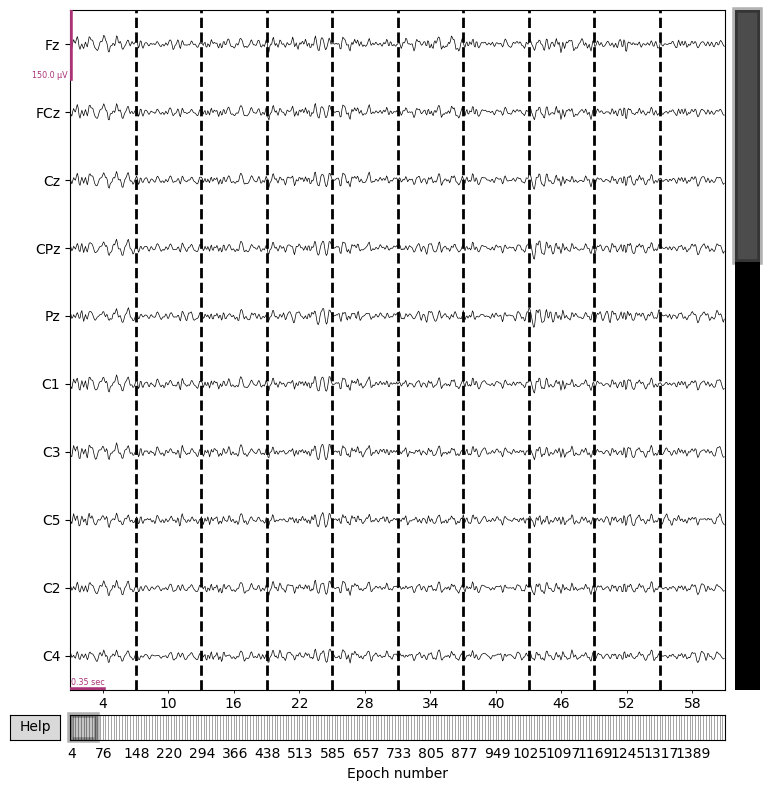

No projector specified for this dataset. Please consider the method self.add_proj.


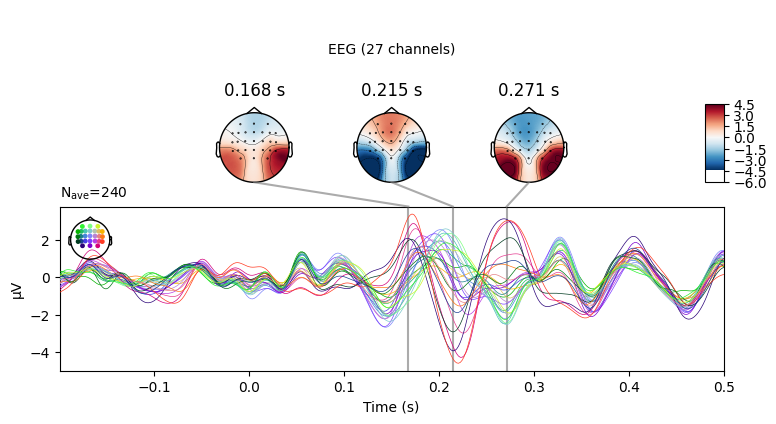

Computing rank from data with rank=None
    Using tolerance 0.00014 (2.2e-16 eps * 32 dim * 2e+10  max singular value)
    Estimated rank (mag): 32
    MAG: rank 32 computed from 32 data channels with 0 projectors
Reducing data rank from 32 -> 32
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00013 (2.2e-16 eps * 32 dim * 1.9e+10  max singular value)
    Estimated rank (mag): 32
    MAG: rank 32 computed from 32 data channels with 0 projectors
Reducing data rank from 32 -> 32
Estimating covariance using EMPIRICAL
Done.
Classification accuracy: 0.58


In [ ]:
### PLAY adjust to left and right hand




# Preprocessing
raw.filter(l_freq=1, h_freq=30)  # Band-pass filter

# Set channel types for non-EEG channels
channel_types = {ch: 'eog' if ch.startswith('EOG') else 'emg' for ch in ['EOG1', 'EOG2', 'EOG3', 'EMGg', 'EMGd']}
raw.set_channel_types(channel_types)

# Set montage
montage = mne.channels.make_standard_montage("standard_1020")
raw.set_montage(montage, on_missing='ignore')



#### Find the events time positions
events, event_id = mne.events_from_annotations(raw)

# events = mne.find_events(raw, shortest_event=1)
#event_id = {'Left Hand': 769, 'Right Hand': 770}
event_id = {'769': 8, '770': 9}
#event_id = {'Left Hand': 5, 'Right Hand': 6}
tmin, tmax = -0.2, 0.5


####DROP-MAYBE ADJUST SO IT DROPS WHOLE TRIAL
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True, baseline=(None, 0), preload=True, event_repeated="drop")

# Visualize the data
epochs.plot(n_epochs=10, n_channels=10, scalings=dict(eeg=75e-6))  # Adjust the `scalings` parameter if necessary
epochs.average().plot_joint()

# Epochs to numpy array (samples, channels, time)
X = epochs.get_data()
y = epochs.events[:, -1]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Classification pipeline
clf = Pipeline([
    ('csp', CSP(n_components=4, reg=None, log=True, norm_trace=False)),
    ('scaler', StandardScaler()),
    ('lda', LinearDiscriminantAnalysis())
])

# Train and evaluate the classifier
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print("Classification accuracy: {:.2f}".format(score))

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.000 (s)


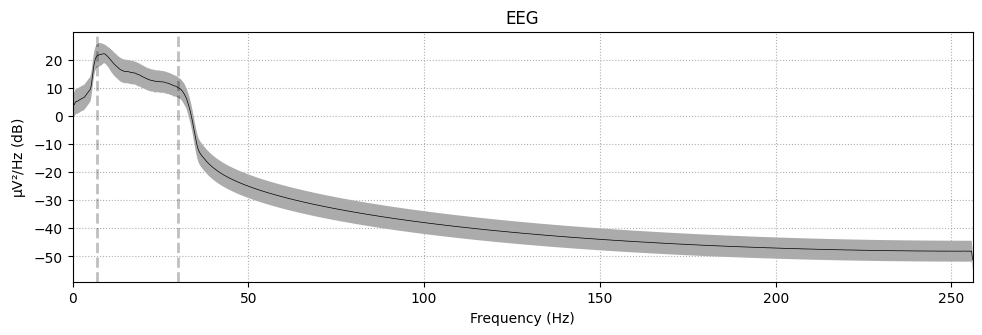

In [ ]:
raw.plot_psd(average=True, spatial_colors=True)

In [ ]:

# get the annotations as a list of tuples
annot_list = raw.annotations.to_data_frame()['description'].tolist()
annot_list[:10]

In [ ]:
# Find the events time positions
events, event_id = mne.events_from_annotations(raw)

# Pre-load the data

raw.load_data()

# Filter the raw signal with a band pass filter in 7-35 Hz

raw.filter(7., 35., fir_design='firwin')

# Remove the EOG channels and pick only desired EEG channels


###DOESNT INCLUDE EOG
#raw.info['bads'] += ['EOG-left', 'EOG-central', 'EOG-right']
raw.info['bads'] += ['EOG1', 'EOG2', 'EOG3']

picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=False, stim=False,
                       exclude='bads')

# Extracts epochs of 3s time period from the datset into 288 events for all 4 classes

tmin, tmax = 1., 4.
# left_hand = 769,right_hand = 770,foot = 771,tongue = 772
#event_id = dict({'769': 7,'770': 8,'771': 9,'772': 10})
#event_id = dict({'32769': 7,'32770': 8,'32775': 9,'32776': 10})

epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True, picks=picks,
                baseline=None, preload=True, event_repeated='drop') #event_repeated='drop' - this will confuse some stuff!!!

Used Annotations descriptions: ['1010', '32769', '32770', '33281', '33282', '33284', '768', '769', '770', '781', '786', '800']
Filtering raw data in 6 contiguous segments
Setting up band-pass filter from 7 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 845 samples (1.650 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.4s finished


Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
1219 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1219 events and 1537 original time points ...
1 bad epochs dropped
